# Association Rule Mining

# DataSet Description

The Dataset we have taken is [Grocerry Market](https://www.kaggle.com/irfanasrullah/groceries) from Kaggle.
The dataset contain transctions of a grocerry market

All the entries in the transctions are of text type.

# Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

# Loading Dataset

In [ ]:
df = pd.read_csv('groceries.csv',names=["Items"],header = None , sep =";")
df.head(10)

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
5,"whole milk,butter,yogurt,rice,abrasive cleaner"
6,rolls/buns
7,"other vegetables,UHT-milk,rolls/buns,bottled b..."
8,potted plants
9,"whole milk,cereals"


# Missing Values

In [ ]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9835 entries, 0 to 9834
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Items   9835 non-null   object
dtypes: object(1)
memory usage: 153.7+ KB


Items    False
dtype: bool

In [ ]:
df.dropna(axis=0,how='any',inplace=True)
df.shape

(9835, 1)

> So there was no any missing entry as number of transctions are still 9835.
# Summary Statistics

In [ ]:
df.describe(include='all')

,Items
count,9835
unique,7011
top,canned beer
freq,260


There are a total of 9835 transctions with different items out of which this dataset have 7011 unique transctions. 

These non unique (duplicate) transactions may have been resulted due to the multiple people purchasing similar items (since they are complementary) and thus we are not deleting those records.

The top (most common) item which shows up in dataset is *canned beer*, the frequency of which is 260.

Since this is a transaction based dataset, since only the product puchased matters, so these are assymetric attributes. In such a case, dimension reduction, normalization and discretization does not makes much sense and hence we have not performed these.

# Exploratory Data Analysis

In [ ]:
transcList = list(df["Items"].apply(lambda row : row.split(",")))

## Max and min number of Items in a Transction

In [ ]:
count_Items=[]
maxi=1e-9
mini=1e9
for transction in transcList:
    count_Items.append(len(transction))
    maxi=max(maxi,len(transction))
    mini=min(mini,len(transction))
    
print("Max number of item in a transaction is: ",maxi)
print("Min number of item in a transaction is: ",mini)

Max number of item in a transction is:  32
Min number of item in a transction is:  1


## Distribution of number of transctions having certain number of items

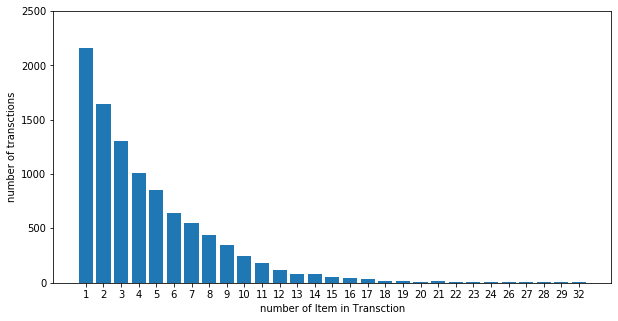

In [ ]:
count_dict={}
for count in count_Items:
    if count in count_dict: 
        count_dict[count]+=1
    else:
        count_dict[count]=1
count_dict=dict(sorted(count_dict.items()))
plt.figure(figsize=(10,5))
plt.bar(range(len(count_dict)), list(count_dict.values()), align='center')
plt.xticks(range(len(count_dict)), list(count_dict.keys()))
plt.xlabel("Number of items in Transction")
plt.ylabel("Number of transctions")
plt.ylim(-2, 2500)
plt.show()


> There are very few transaction (less than 500) in which people have purchased more than 8 items.

## 20 Most Common Items 

In [ ]:
allItems = df.Items.values
countingr = Counter()
for item in allItems:
     countingr[item] += 1
print("The most commonly purchased item with count are:")
print()
print ("{:<30} {:<10}".format("Item",'Count')) 
print()
for item in countingr.most_common(20):
    print ("{:<30} {:<10}".format(item[0],item[1]))

mostcommon = countingr.most_common(20)
mostcommonItem = [i[0] for i in mostcommon]
mostcommonItem_count = [i[1] for i in mostcommon]

The most commonly purchased Item with count are:

Item                           Count     

canned beer                    260       
soda                           156       
whole milk                     121       
bottled beer                   120       
rolls/buns                     109       
bottled water                  67        
other vegetables               62        
newspapers                     54        
shopping bags                  48        
yogurt                         40        
coffee                         39        
pastry                         37        
chocolate                      35        
ice cream                      34        
misc. beverages                31        
salty snack                    30        
pip fruit                      28        
pastry,soda                    27        
pork                           27        
photo/film                     27        


In [ ]:
def getColours(numOfColors):
    colors = []
    for i in range(numOfColors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

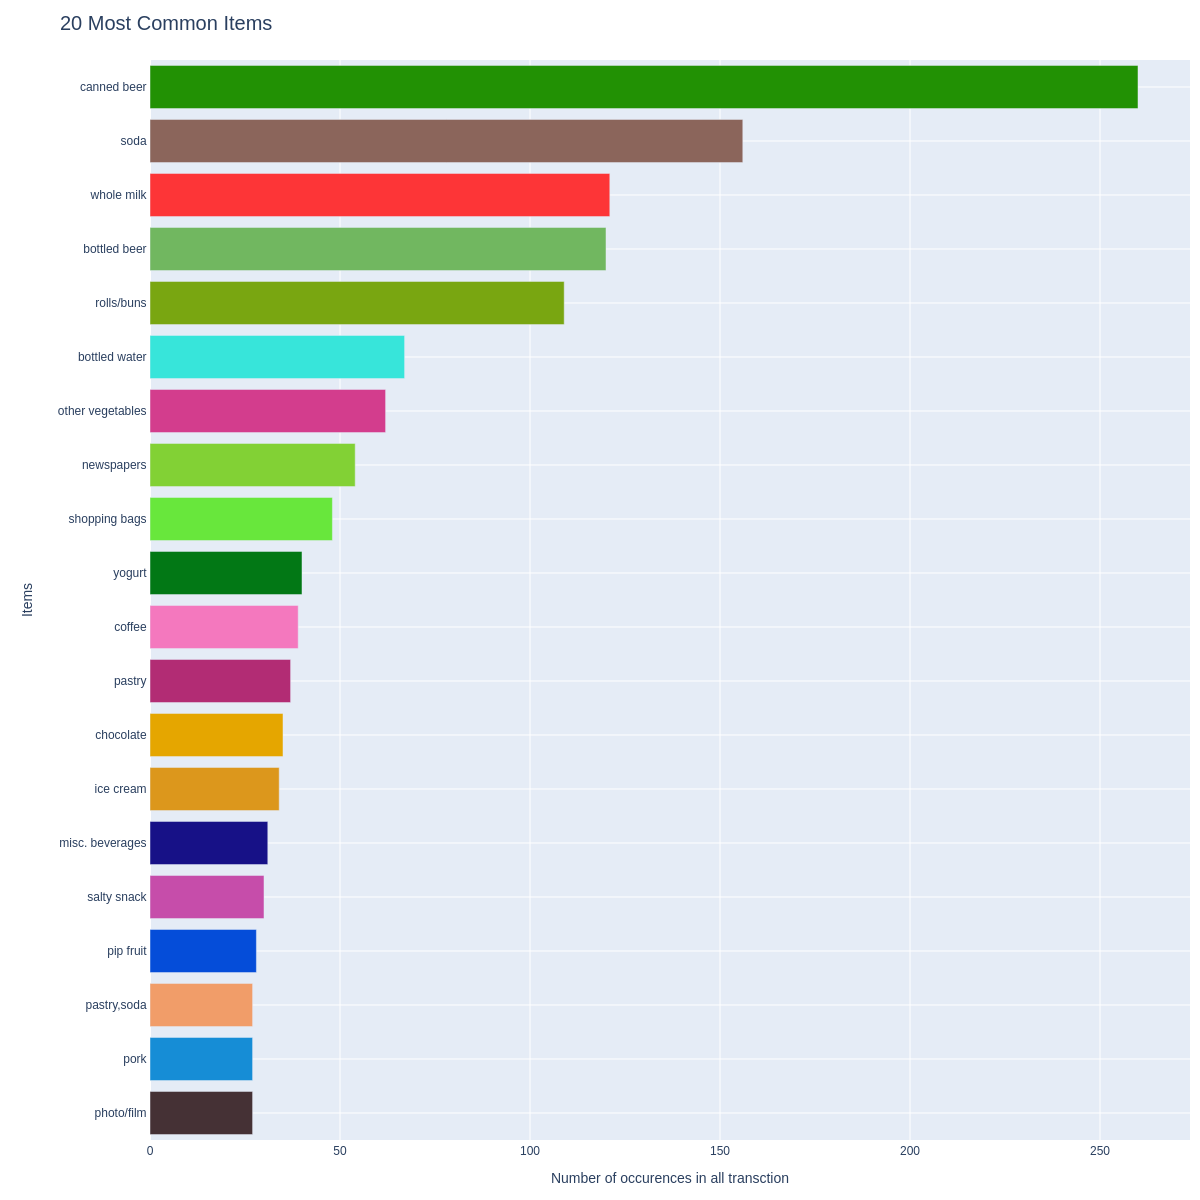

In [ ]:
trace = go.Bar(
            x=mostcommonItem_count[::-1],
            y= mostcommonItem[::-1],
            orientation = 'h',marker = dict(color = getColours(20),
))
layout = go.Layout(
    xaxis = dict(title= 'Number of occurences in all transctions', ),
    yaxis = dict(title='Items',),
    title= '20 Most Common Items', titlefont = dict(size = 20),
    margin=dict(l=150,r=10,b=60,t=60,pad=0),
    width=1000, height=1000, 
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
imgbytes = fig.to_image(format='png', width=1200, height=1200, scale=1)
Image(imgbytes)